In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
extracted_data = pd.read_csv('data/openb_pod_list_cpu0.csv')
extracted_data.head()

,name,cpu_milli,memory_mib,num_gpu,gpu_milli,gpu_spec,qos,pod_phase,creation_time,deletion_time,scheduled_time
0,openb-pod-0000,12000,16384,1,1000,NaN,LS,Running,0,12537496,0.0
1,openb-pod-0001,6000,12288,1,460,NaN,LS,Running,427061,12902960,427061.0
2,openb-pod-0002,12000,24576,1,1000,NaN,LS,Running,1558381,12902960,1558381.0
3,openb-pod-0003,6000,12288,1,460,NaN,LS,Running,2690044,12902960,2690044.0
4,openb-pod-0004,12000,16384,1,1000,NaN,LS,Running,2758084,12902960,2758084.0


In [3]:
extracted_data.describe()

,cpu_milli,memory_mib,num_gpu,gpu_milli,gpu_spec,creation_time,deletion_time,scheduled_time
count,7064.000000,7064.000000,7064.000000,7064.000000,0.0,7.064000e+03,7.064000e+03,6.203000e+03
mean,9376.856172,35446.847537,1.052237,809.428086,NaN,1.156213e+07,1.158930e+07,1.153303e+07
std,7669.191313,35133.357315,0.569124,258.497299,NaN,9.652399e+05,8.983035e+05,9.741989e+05
min,1000.000000,0.000000,1.000000,50.000000,NaN,0.000000e+00,9.964972e+06,0.000000e+00
25%,4000.000000,10600.000000,1.000000,650.000000,NaN,1.074247e+07,1.077293e+07,1.071519e+07
50%,11300.000000,31250.000000,1.000000,1000.000000,NaN,1.155749e+07,1.156850e+07,1.150651e+07
75%,11908.000000,49152.000000,1.000000,1000.000000,NaN,1.242952e+07,1.243846e+07,1.239838e+07
max,120200.000000,737280.000000,8.000000,1000.000000,NaN,1.290176e+07,1.290296e+07,1.290176e+07


In [4]:
data = extracted_data.copy()
data.fillna(0, inplace=True)  
data.describe()

,cpu_milli,memory_mib,num_gpu,gpu_milli,gpu_spec,creation_time,deletion_time,scheduled_time
count,7064.000000,7064.000000,7064.000000,7064.000000,7064.0,7.064000e+03,7.064000e+03,7.064000e+03
mean,9376.856172,35446.847537,1.052237,809.428086,0.0,1.156213e+07,1.158930e+07,1.012732e+07
std,7669.191313,35133.357315,0.569124,258.497299,0.0,9.652399e+05,8.983035e+05,3.882199e+06
min,1000.000000,0.000000,1.000000,50.000000,0.0,0.000000e+00,9.964972e+06,0.000000e+00
25%,4000.000000,10600.000000,1.000000,650.000000,0.0,1.074247e+07,1.077293e+07,1.043457e+07
50%,11300.000000,31250.000000,1.000000,1000.000000,0.0,1.155749e+07,1.156850e+07,1.131273e+07
75%,11908.000000,49152.000000,1.000000,1000.000000,0.0,1.242952e+07,1.243846e+07,1.224874e+07
max,120200.000000,737280.000000,8.000000,1000.000000,0.0,1.290176e+07,1.290296e+07,1.290176e+07


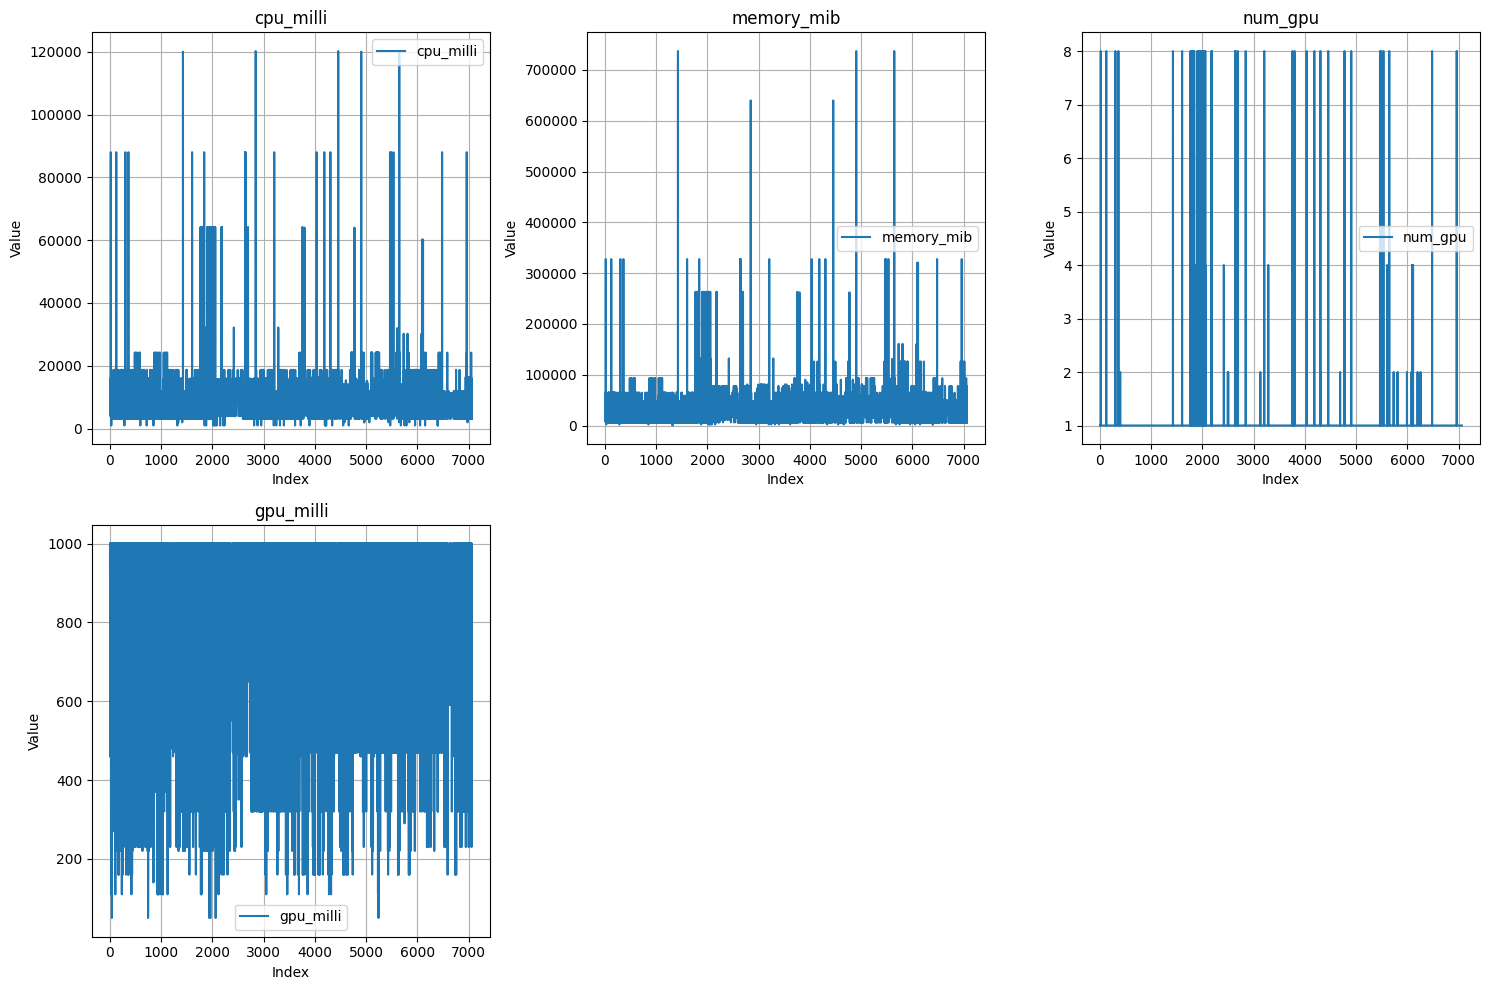

In [6]:
# Select only numeric columns
costos_data = data[['cpu_milli', 'memory_mib','num_gpu', 'gpu_milli']]

import matplotlib.pyplot as plt

# Calcular el número de filas necesarias
n_columns = len(costos_data.columns)
n_rows = (n_columns + 2) // 3  # Redondeo hacia arriba

# Crear una figura con subplots organizados en filas de 3
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))

# Aplanar el arreglo de ejes para facilitar la iteración
axes = axes.flatten()

# Ocultar ejes sobrantes si el número de columnas no es múltiplo de 3
for ax in axes[n_columns:]:
    ax.axis('off')

# Graficar cada columna en su respectivo subplot
for ax, column in zip(axes, costos_data.columns):
    ax.plot(costos_data[column], label=column)
    ax.set_title(column)
    ax.set_xlabel("Index")
    ax.set_ylabel("Value")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

NameError: name 'numeric_columns' is not defined

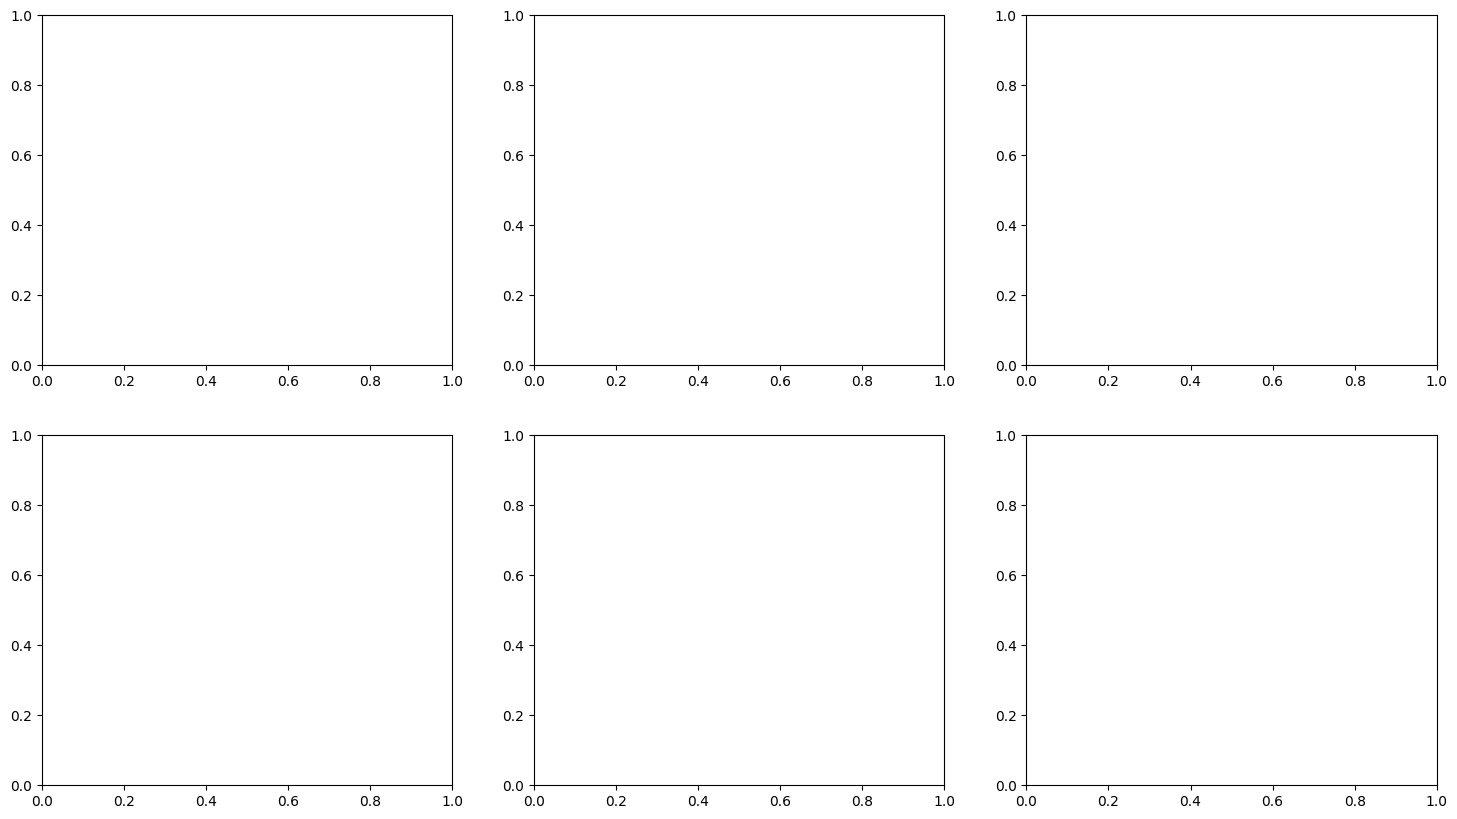

In [8]:
# Create subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5 * n_rows))
axes = axes.flatten()  
n_plots = len(numeric_columns)
# Hide unused subplots if any
for ax in axes[n_plots:]:
    ax.axis('off')

# Plot each numeric column as a boxplot
for ax, column in zip(axes, costos_data):
    sns.boxplot(data=costos_data, x=column, ax=ax)
    ax.set_title(f"Box Plot - {column}")
    ax.set_xlabel(column)
    ax.grid(True)

plt.tight_layout()  # Prevent overlapping
plt.show()

In [ ]:
from utils.udf import calculate_cloud_cost

# Calcular costos para todas las filas
costos = costos_data.apply(calculate_cloud_cost, axis=1)

# Combinar resultados
costos_data = pd.concat([costos_data, costos], axis=1)

costos_data.head()

In [ ]:
# Crear variable objetivo: proveedor óptimo
costos_data['best_provider'] = costos_data[['cost_aws', 'cost_gcp', 'cost_azure']].idxmin(axis=1)
costos_data['best_provider'] = costos_data['best_provider'].str.replace('cost_', '')

# Calcular diferencia porcentual vs el más barato
costos_data['ahorro_pct'] = (costos_data[['cost_aws', 'cost_gcp', 'cost_azure']].min(axis=1) / 
                   costos_data[['cost_aws', 'cost_gcp', 'cost_azure']].max(axis=1) - 1).round(2)

In [ ]:
costos_data.head()

predecir el costo en cada plataforma basándose en los recursos utilizados
comparar cuál proveedor es más económico bajo ciertas configuraciones
optimizar la asignación de recursos para minimizar costos

problema de regresión (predecir un valor numérico como el costo), 
podrían usarse modelos como Regresión Lineal, Random Forest, Gradient Boosting (como XGBoost o LightGBM), o incluso redes neuronales si hay suficientes datos. 

Además, sería útil hacer un análisis comparativo de los costos entre las tres nubes usando estadísticas descriptivas o pruebas de hipótesis.

### 1. Modelo de Regresion lineal

### Paso 1: Preparación de Datos

In [ ]:
lista_costos = ['cost_aws', 'cost_gcp', 'cost_azure']

# Crear una figura con subplots
fig, axes = plt.subplots(1, len(lista_costos), figsize=(15, 5), sharex=True, sharey=True)

for i, costo in enumerate(lista_costos):
    # Seleccionar variables: recursos (X) y costo (y)
    X = costos_data[['cpu_milli', 'memory_mib', 'num_gpu', 'gpu_milli']]
    y = costos_data[costo]

    # Dividir en entrenamiento (80%) y prueba (20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predecir sobre los datos de prueba
    y_pred = model.predict(X_test)

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Resultados para {costo}:")
    print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
    print(f"Coeficiente de Determinación (R²): {r2:.2f}")

    # Gráfico de valores reales vs. predichos
    ax = axes[i]
    ax.scatter(y_test, y_pred, alpha=0.5)
    ax.set_xlabel(f'Reales ({costo})')
    ax.set_ylabel(f'Predichos ({costo})')
    ax.set_title(f'{costo}\nMSE: {mse:.2f}, R²: {r2:.2f}')
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')  # Línea de referencia

# Ajustar diseño
plt.tight_layout()
plt.show()


### Paso 2: Entrenamiento del Modelo

In [ ]:
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

### Paso 3: Evaluación del Modelo

In [ ]:
# Asegurar que los conjuntos sean distintos
print("Tamaño del entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)

In [ ]:
data = data.drop_duplicates()
# Repetir división y entrenamiento...

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reentrenar el modelo
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Recalcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (normalizado): {mse:.2f}")
print(f"R² (normalizado): {r2:.2f}")